## Original Companies Dataset Overview

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Datasets/clean_supercias_75K.csv')
df.head()

,2020,2019,EXPEDIENTE,NOMBRE,TIPO COMPAÑIA,ACTIVIDAD ECONÓMICA,REGION,PROVINCIA,CIUDAD,TAMAÑO,SECTOR,CANT. EMPLEADOS,ACTIVO2020,PATRIMONIO2020,INGRESOS POR VENTA2020,UTILIDAD ANTES DE 2020,UTILIDAD DEL EJERCICIO2020,UTILIDAD NETA2020,IR CAUSADO2020,INGRESO TOTAL2020
0,1.0,1,384.0,CORPORACION FAVORITA C.A.,ANÓNIMA,G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,MERCADO DE VALORES,10768.0,2.121860e+09,1.482973e+09,2.170603e+09,187168402.3,2.201981e+08,1.474992e+08,41971212.00,2.170603e+09
1,2.0,4,6796.0,ECUACORRIENTE,ANÓNIMA,B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...,ORIENTE,ZAMORA CHINCHIPE ...,EL PANGUI ...,GRANDE,SOCIETARIO,966.0,1.607423e+09,5.689866e+08,0.000000e+00,-1387158.7,0.000000e+00,-2.633856e+06,1246697.02,0.000000e+00
2,3.0,3,93144.0,AURELIAN ECUADOR,ANÓNIMA,B0899.09 - EXTRACCIÓN DE OTROS MINERALES: ASBE...,ORIENTE,ZAMORA CHINCHIPE ...,LOS ENCUENTROS ...,GRANDE,SOCIETARIO,1451.0,1.599727e+09,6.052935e+08,3.587926e+08,-49399080.0,-4.939908e+07,-4.939908e+07,0.00,3.588240e+08
3,4.0,2,705547.0,SHAYA ECUADOR,ANÓNIMA,B0910.01 - ACTIVIDADES DE SERVICIOS DE EXTRACC...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,SOCIETARIO,92.0,1.354952e+09,7.868173e+08,6.690761e+08,179317070.0,2.109613e+08,1.337093e+08,45607812.10,6.690761e+08
4,5.0,5,47845.0,CONSORCIO ECUATORIANO DE TELECOMUNICACIONES CO...,ANÓNIMA,"J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...",COSTA,GUAYAS ...,GUAYAQUIL ...,GRANDE,SOCIETARIO,2844.0,1.217718e+09,2.647091e+08,1.066242e+09,174644376.0,2.048239e+08,1.068268e+08,67817626.00,1.071561e+09


In [4]:
# How many companies we have in the original dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75165 entries, 0 to 75164
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   2020                        75165 non-null  float64
 1   2019                        75165 non-null  object 
 2   EXPEDIENTE                  75165 non-null  float64
 3   NOMBRE                      75165 non-null  object 
 4   TIPO COMPAÑIA               75165 non-null  object 
 5   ACTIVIDAD ECONÓMICA         75165 non-null  object 
 6   REGION                      75165 non-null  object 
 7   PROVINCIA                   75165 non-null  object 
 8   CIUDAD                      75165 non-null  object 
 9   TAMAÑO                      75165 non-null  object 
 10  SECTOR                      75165 non-null  object 
 11  CANT. EMPLEADOS             75164 non-null  float64
 12  ACTIVO2020                  62489 non-null  float64
 13  PATRIMONIO2020              751

## Reviewing past overview findings

In [5]:
# How many unique company sectors there are registered?
df.SECTOR.unique()

array(['MERCADO DE VALORES', 'SOCIETARIO'], dtype=object)

In [6]:
# What are the sizing categories for companies according to SuperCias
df.TAMAÑO.unique()

array(['GRANDE', 'MEDIANA', 'MICROEMPRESA', 'PEQUEÑA'], dtype=object)

In [7]:
# What are the company types we'll be working with
df["TIPO COMPAÑIA"].unique()

array(['ANÓNIMA', 'SUCURSAL  EXTRANJERA', 'RESPONSABILIDAD LIMITADA',
       'SOCIEDAD POR ACCIONES SIMPLIFICADA', 'ASOCIACIÓN O CONSORCIO',
       'ANÓNIMA  EN PREDIOS RÚSTICOS', 'ECONOMÍA MIXTA',
       'ANÓNIMA MULTINACIONAL ANDINA', 'COMANDITA POR ACCIONES'],
      dtype=object)

In [8]:
# How are the companies distributed in between such categories
proportion = df.groupby("TAMAÑO")['NOMBRE'].count()
proportion


TAMAÑO
GRANDE           2588
MEDIANA          6124
MICROEMPRESA    47787
PEQUEÑA         18666
Name: NOMBRE, dtype: int64

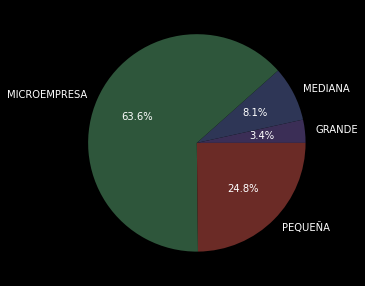

In [9]:
plot = proportion.plot.pie(y='NOMBRE', figsize=(5, 5), label="", colors= ["#3b2e56", "#2e3656", "#2e563b", "#6b2b26"] ,autopct='%1.1f%%')

In [12]:
# What is the impact/influence of the top companies on the Ecuadorian workforce according to the Dataset
top_1000 = df.head(1000)
rest = df[1000:]
total_emp = df["CANT. EMPLEADOS"].sum()
top_emp = top_1000["CANT. EMPLEADOS"].sum()
rest_emp = rest["CANT. EMPLEADOS"].sum()

top_perc = top_emp/total_emp
rest_perc = rest_emp/total_emp

print(top_emp, rest_emp)
print(top_perc, rest_perc)


342636.0 1090847.0
0.23902341360169602 0.760976586398304


In [13]:
workforce = pd.DataFrame({'EMPLEADOS': [top_emp, rest_emp]}, index=['Top_1000', 'Rest_emp'])
workforce

,EMPLEADOS
Top_1000,342636.0
Rest_emp,1090847.0


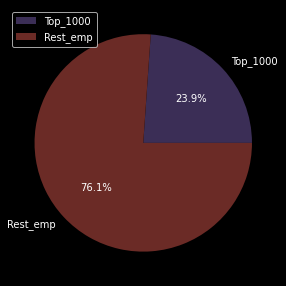

In [14]:
workplot = workforce.plot.pie(y='EMPLEADOS', figsize=(5, 5), label="", colors= ["#3b2e56",  "#6b2b26"] ,autopct='%1.1f%%')


In [15]:
# Let's take a look at amount of employees
df.loc[df["CANT. EMPLEADOS"] < 10].shape

(62178, 20)